In [14]:
from sklearn.datasets import fetch_openml
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt 
import numpy as np
import random
import time

Charger le jeu de données MNIST..
Diviser la base de données en 49000 lignes pour l’apprentissage (training) et
le reste pour les tests.


In [15]:
mnist = fetch_openml('mnist_784', as_frame = False)

In [16]:
data = np.random.randint(70000, size=5000)
small_dataset = mnist.data[data]
small_targets = mnist.target[data]
xtrain, xtest, ytrain, ytest = train_test_split(mnist.data, mnist.target, train_size=0.7)

Construire un modèle de classification ayant comme paramètre :
hidden_layer_sizes = (50), puis calculez la précession du classifieur ;

In [6]:
clf = MLPClassifier(hidden_layer_sizes=(50)).fit(xtrain, ytrain)

In [7]:
ypredicted = clf.predict(xtest)
clf.predict_proba(xtest[:2])

array([[4.75215477e-63, 2.21531674e-18, 2.52091091e-54, 5.61127337e-34,
        6.54826153e-26, 3.98209371e-37, 7.93256749e-32, 6.40715781e-36,
        5.05703984e-04, 9.99494296e-01],
       [3.38875608e-74, 1.49131874e-72, 1.12157613e-58, 2.73394509e-45,
        4.34223792e-72, 8.42042026e-40, 5.61349399e-44, 1.00000000e+00,
        9.10053967e-57, 9.17977852e-40]])

In [8]:
clf.score(xtest, ytest)

0.864

Afficher la classe de l’image 4 et sa classe prédite.

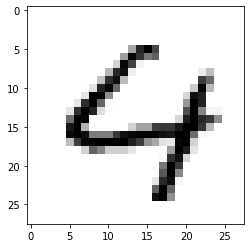

'8'

In [9]:
images_new = xtest.reshape((-1, 28, 28))
plt.imshow(images_new[3],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show() 
ypredicted[3]

Calculez la précession en utilisant le package :
metrics.precision_score(ytest_pr, ypredTest_pr,average='micro').

In [10]:
metrics.precision_score(ytest, ypredicted ,average='micro')

0.864

Varier le nombre de couches de 1 entre (2 et 80) couches, et recalculer la
précision du classifieur avec un nombre de neurones pour chaque couche de 50.

In [ ]:
layer = (50,)

scorelist = []
nbrlayers = []
temps = []
error = []
for ls in range(2, 80):
    
    layer += (50,)
    print(layer)
    tp1 = time.time()
    clf = MLPClassifier(hidden_layer_sizes=(layer)).fit(xtrain, ytrain)
    clf.fit(xtrain, ytrain)
    ypredicted = clf.predict(xtest)
    clf.predict_proba(xtest)
    tp2 = time.time()
    score = clf.score(xtest, ytest)
    error_ = metrics.zero_one_loss(ytest, ypredicted)
    error.append(error_)
    scorelist.append(score)
    nbrlayers.append(len(layer))
    temps.append(tp2-tp1)
    print("Score avec %d hidden couches: %.4f" % (ls, score))
    print(metrics.zero_one_loss(ytest, ypredicted)) 
    print(1-metrics.zero_one_loss(ytest, ypredicted)) 
    print(metrics.precision_score(ytest, ypredicted, average = 'weighted'))
    print('\n')
    # Research what average means, include multiple averages 


(50, 50)
Score avec 2 hidden couches: 0.8473
0.15266666666666662
0.8473333333333334
0.8493606191942943


(50, 50, 50)
Score avec 3 hidden couches: 0.8740
0.126
0.874
0.8774036992075195


(50, 50, 50, 50)
Score avec 4 hidden couches: 0.8407
0.15933333333333333
0.8406666666666667
0.8447255352530592


(50, 50, 50, 50, 50)
Score avec 5 hidden couches: 0.8713
0.1286666666666667
0.8713333333333333
0.8728746197076571


(50, 50, 50, 50, 50, 50)
Score avec 6 hidden couches: 0.8760
0.124
0.876
0.8780087592051014


(50, 50, 50, 50, 50, 50, 50)
Score avec 7 hidden couches: 0.8853
0.1146666666666667
0.8853333333333333
0.8873282547083392


(50, 50, 50, 50, 50, 50, 50, 50)
Score avec 8 hidden couches: 0.8933
0.10666666666666669
0.8933333333333333
0.8955123368500584


(50, 50, 50, 50, 50, 50, 50, 50, 50)
Score avec 9 hidden couches: 0.9087
0.09133333333333338
0.9086666666666666
0.9115275895616437


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Score avec 10 hidden couches: 0.9060
0.09399999999999997
0.906


C:\Users\calme\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Score avec 37 hidden couches: 0.8673
0.1326666666666667
0.8673333333333333
0.8689116664142004


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Score avec 38 hidden couches: 0.6273
0.3726666666666667
0.6273333333333333
0.6353325109141192


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Score avec 39 hidden couches: 0.8233
0.17666666666666664
0.8233333333333334
0.838813381673999


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Score avec 40 hidden couches: 0.4620
0.538
0.46199999999999997
0.3651383939639324


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 

C:\Users\calme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Score avec 41 hidden couches: 0.8173
0.18266666666666664
0.8173333333333334
0.8270794255005073


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Score avec 42 hidden couches: 0.2687
0.7313333333333334
0.2686666666666666
0.3113729494236213


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)


C:\Users\calme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Score avec 43 hidden couches: 0.8560
0.14400000000000002
0.856
0.8630914329416746


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Score avec 44 hidden couches: 0.3880
0.612
0.388
0.3156098648824169


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)


C:\Users\calme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Score avec 45 hidden couches: 0.8587
0.1413333333333333
0.8586666666666667
0.8685725450393839


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Score avec 46 hidden couches: 0.8127
0.18733333333333335
0.8126666666666666
0.8252879742076831


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Score avec 47 hidden couches: 0.5600
0.43999999999999995
0.56
0.5443911860529914


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)


C:\Users\calme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Score avec 48 hidden couches: 0.8340
0.16600000000000004
0.834
0.8415141883074537


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Score avec 49 hidden couches: 0.7260
0.274
0.726
0.7400048715666933


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)
Score avec 50 hidden couches: 0.1327
0.8673333333333333
0.1326666666666667
0.017600444444444443


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)


C:\Users\calme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Score avec 51 hidden couches: 0.1327
0.8673333333333333
0.1326666666666667
0.017600444444444443


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)


C:\Users\calme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Score avec 52 hidden couches: 0.1327
0.8673333333333333
0.1326666666666667
0.017600444444444443


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)


C:\Users\calme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Score avec 53 hidden couches: 0.1327
0.8673333333333333
0.1326666666666667
0.017600444444444443


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)


C:\Users\calme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Score avec 54 hidden couches: 0.1327
0.8673333333333333
0.1326666666666667
0.017600444444444443


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)


C:\Users\calme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Score avec 55 hidden couches: 0.1327
0.8673333333333333
0.1326666666666667
0.017600444444444443


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)


C:\Users\calme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Score avec 56 hidden couches: 0.1327
0.8673333333333333
0.1326666666666667
0.017600444444444443


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)


C:\Users\calme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Score avec 57 hidden couches: 0.1327
0.8673333333333333
0.1326666666666667
0.017600444444444443


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)


C:\Users\calme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Score avec 58 hidden couches: 0.1327
0.8673333333333333
0.1326666666666667
0.017600444444444443


(50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50)


C:\Users\calme\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
plt.title("Score en fonction du nombre de couches")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(nbrlayers, scorelist)

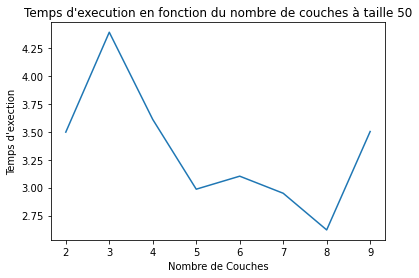

In [57]:
plt.title("Temps d'execution en fonction du nombre de couches")
plt.xlabel("Nombre de Couches")
plt.ylabel("Temps d'execution")
plt.plot(nbrlayers, temps)

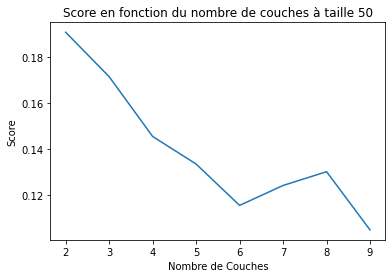

In [62]:
plt.title("Erreur en fonction du nombre de couches")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(nbrlayers, error)

Construire cinq modèles de classification des données mnist, avec des
réseaux qui ont respectivement de 1 à 10 couches cachées, et des tailles de
couches entre 10 et 300 neurones au choix d’une façon aléatoire. Quelles
sont les performances en taux de bonne classification et en temps
d’apprentissage obtenus pour chaque modèle ? Utilisez la fonction time() du
package time pour mesurer le temps d’apprentissage d’un modèle.


In [6]:
scorelist = []
nbrlayers = []
temps = []
error = []
# On chosit un nombre de neurones aléatoires
for i in range(1, 10, 2):
    tps1 = time.time()
    layer = (random.randint(10, 300),)
    for ls in range(1, i):
        layer += (random.randint(10, 300),)
    print(layer)
    clf = MLPClassifier(hidden_layer_sizes=(layer)).fit(xtrain, ytrain)
    clf.fit(xtrain, ytrain)
    ypredicted = clf.predict(xtest)
    clf.predict_proba(xtest)
    tps2 = time.time()
    score = clf.score(xtest, ytest)
    error_ = metrics.zero_one_loss(ytest, ypredicted)
    error.append(error_)
    scorelist.append(score)
    nbrlayers.append(len(layer))
    temps.append(tps2-tps1)
    print("Score avec %d hidden couches: %.4f \nwith a time = %.3f" % (len(layer), score, (tps2 - tps1)))

(151,)
Score avec 1 hidden couches: 0.9686 
with a time = 99.591
(12, 160, 132)
Score avec 3 hidden couches: 0.9427 
with a time = 105.522
(95, 164, 17, 120, 119)
Score avec 5 hidden couches: 0.9709 
with a time = 146.508
(237, 201, 31, 148, 22, 192, 258)
Score avec 7 hidden couches: 0.9780 
with a time = 416.358
(212, 204, 227, 19, 25, 99, 139, 164, 83)
Score avec 9 hidden couches: 0.9797 
with a time = 232.233


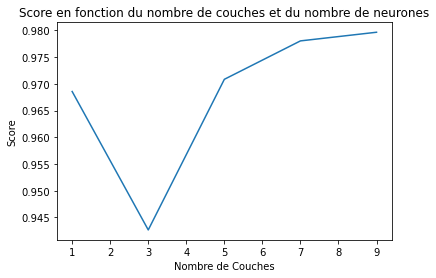

In [7]:
plt.title("Score en fonction du nombre de couches et du nombre de neurones")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(nbrlayers, scorelist)

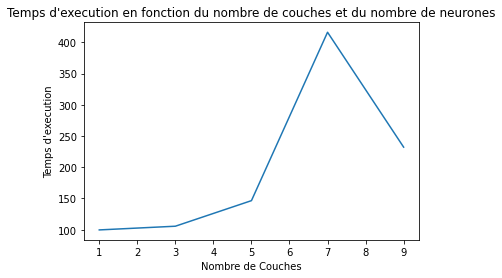

In [8]:
plt.title("Temps d'execution en fonction du nombre de couches et du nombre de neurones")
plt.xlabel("Nombre de Couches")
plt.ylabel("Temps d'execution")
plt.plot(nbrlayers, temps)

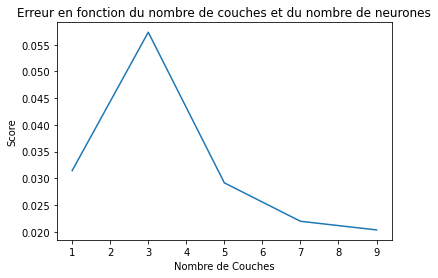

In [9]:
plt.title("Erreur en fonction du nombre de couches et du nombre de neurones")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(nbrlayers, error)

In [40]:
scorelist = []
nbrlayers = []
temps = []
error = []
# On choisit un nombre de neurones croissants
number = 20
for i in range(1, 10, 2):
    tps1 = time.time()
    layer = (random.randint(10, number),)
    for ls in range(1, i):
        layer += (random.randint(number, number + 20),)
        number += 20
    print(layer)
    clf = MLPClassifier(hidden_layer_sizes=(layer)).fit(xtrain, ytrain)
    clf.fit(xtrain, ytrain)
    ypredicted = clf.predict(xtest)
    clf.predict_proba(xtest)
    tps2 = time.time()
    score = clf.score(xtest, ytest)
    error_ = metrics.zero_one_loss(ytest, ypredicted)
    error.append(error_)
    scorelist.append(score)
    nbrlayers.append(len(layer))
    temps.append(tps2-tps1)
    print("Score avec %d hidden couches: %.4f \nwith a time = %.3f" % (len(layer), clf.score(xtest, ytest), (tps2 - tps1)))

(19,)


/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score avec 1 hidden couches: 0.7860 
with a time = 5.643
(14, 28, 52)


/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Score avec 3 hidden couches: 0.8267 
with a time = 6.472
(37, 80, 88, 114, 123)
Score avec 5 hidden couches: 0.8527 
with a time = 6.720
(21, 159, 177, 198, 210, 223, 258)
Score avec 7 hidden couches: 0.8947 
with a time = 14.711
(78, 261, 287, 309, 324, 343, 374, 380, 413)
Score avec 9 hidden couches: 0.9053 
with a time = 28.743


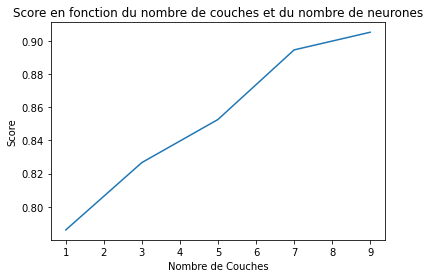

In [41]:
plt.title("Score en fonction du nombre de couches et du nombre de neurones")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(nbrlayers, scorelist)

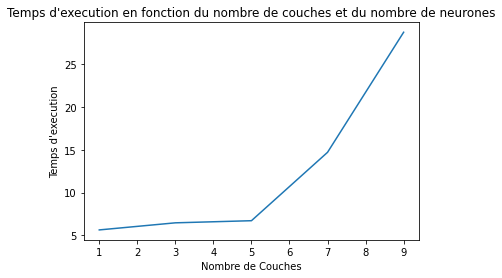

In [42]:
plt.title("Temps d'execution en fonction du nombre de couches et du nombre de neurones")
plt.xlabel("Nombre de Couches")
plt.ylabel("Temps d'execution")
plt.plot(nbrlayers, temps)

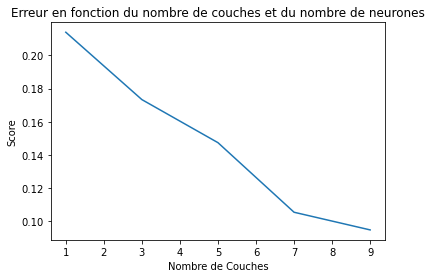

In [43]:
plt.title("Erreur en fonction du nombre de couches et du nombre de neurones")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(nbrlayers, error)

In [44]:
scorelist = []
nbrlayers = []
temps = []
error = []
# On choisit un nombre de neurones décroissants
number = 200
for i in range(1, 10, 2):
    number = 200
    tps1 = time.time()
    layer = (random.randint(number-20, number),)
    for ls in range(1, i):
        layer += (random.randint(number - 20,number),)
        number = number - 20
    print(layer)
    clf = MLPClassifier(hidden_layer_sizes=(layer)).fit(xtrain, ytrain)
    clf.fit(xtrain, ytrain)
    ypredicted = clf.predict(xtest)
    clf.predict_proba(xtest)
    tps2 = time.time()
    score = clf.score(xtest, ytest)
    error_ = metrics.zero_one_loss(ytest, ypredicted)
    error.append(error_)
    scorelist.append(score)
    nbrlayers.append(len(layer))
    temps.append(tps2-tps1)
    print("Score avec %d hidden couches: %.4f \nwith a time = %.3f" % (len(layer), clf.score(xtest, ytest), (tps2 - tps1)))

(195,)
Score avec 1 hidden couches: 0.8933 
with a time = 4.093
(195, 196, 170)
Score avec 3 hidden couches: 0.8793 
with a time = 5.268
(188, 195, 173, 148, 125)
Score avec 5 hidden couches: 0.8853 
with a time = 9.855
(183, 190, 178, 142, 137, 110, 84)
Score avec 7 hidden couches: 0.9040 
with a time = 10.215
(194, 185, 160, 140, 132, 114, 100, 76, 47)
Score avec 9 hidden couches: 0.9253 
with a time = 10.521


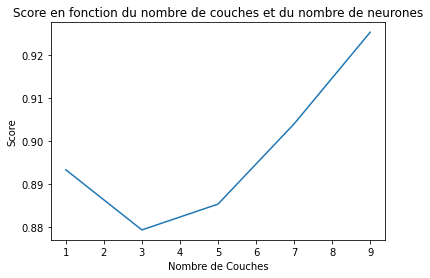

In [45]:
plt.title("Score en fonction du nombre de couches et du nombre de neurones")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(nbrlayers, scorelist)

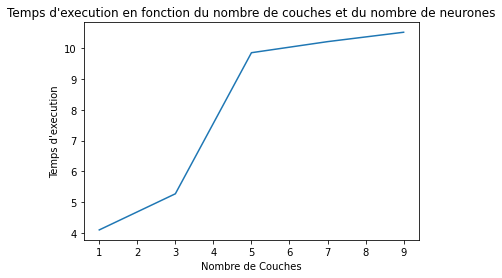

In [46]:
plt.title("Temps d'execution en fonction du nombre de couches et du nombre de neurones")
plt.xlabel("Nombre de Couches")
plt.ylabel("Temps d'execution")
plt.plot(nbrlayers, temps)

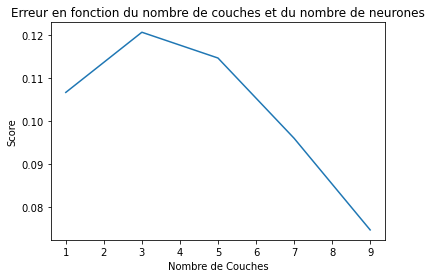

In [47]:
plt.title("Erreur en fonction du nombre de couches et du nombre de neurones")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(nbrlayers, error)

In [48]:
scorelist = []
nbrlayers = []
temps = []
error = []
# On choisit un nombre de neurones croissants puis décroissants
number = 20
for i in range(1, 10, 2):
    number = 50
    tps1 = time.time()
    layer = (random.randint(10, number),)
    for ls in range(1, i):
        if ls <= int(i / 2):
            layer += (random.randint(number, number + 20),)
            number += 30
        else:
            layer += (random.randint(number - 20, number),)
            number = number - 30
            
    print(layer)
    clf = MLPClassifier(hidden_layer_sizes=(layer)).fit(xtrain, ytrain)
    clf.fit(xtrain, ytrain)
    ypredicted = clf.predict(xtest)
    clf.predict_proba(xtest)
    tps2 = time.time()
    score = clf.score(xtest, ytest)
    error_ = metrics.zero_one_loss(ytest, ypredicted)
    error.append(error_)
    scorelist.append(score)
    nbrlayers.append(len(layer))
    temps.append(tps2-tps1)
    print("Score avec %d hidden couches: %.4f \nwith a time = %.3f" % (len(layer), clf.score(xtest, ytest), (tps2 - tps1)))

(39,)
Score avec 1 hidden couches: 0.8713 
with a time = 5.310
(19, 57, 75)
Score avec 3 hidden couches: 0.8467 
with a time = 8.319
(36, 64, 99, 90, 62)
Score avec 5 hidden couches: 0.8460 
with a time = 6.350
(34, 63, 94, 117, 131, 97, 75)
Score avec 7 hidden couches: 0.8820 
with a time = 6.530
(10, 57, 92, 114, 145, 167, 136, 98, 69)
Score avec 9 hidden couches: 0.8673 
with a time = 9.994


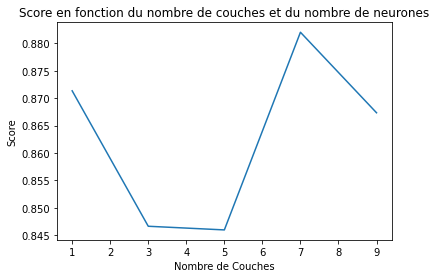

In [49]:
plt.title("Score en fonction du nombre de couches et du nombre de neurones")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(nbrlayers, scorelist)

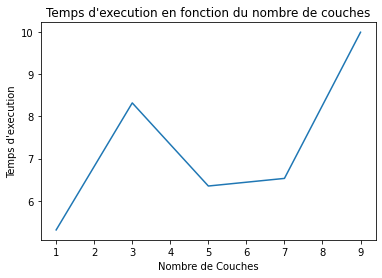

In [50]:
plt.title("Temps d'execution en fonction du nombre de couches")
plt.xlabel("Nombre de Couches")
plt.ylabel("Temps d'execution")
plt.plot(nbrlayers, temps)

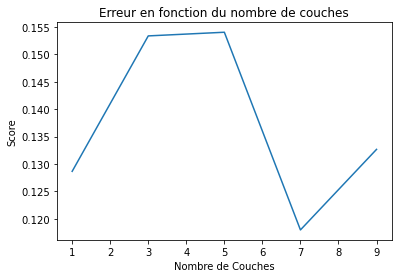

In [51]:
plt.title("Erreur en fonction du nombre de couches")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(nbrlayers, error)

Étudier la convergence des algorithmes d’optimisation disponibles : L-BFGS,
SGD et Adam.

In [52]:
solvers = ['adam', 'lbfgs', 'sgd']
error = []
scorelist = []
temps = []
for solver in solvers:
    tps1 = time.time()
    clf = MLPClassifier(hidden_layer_sizes=(181, 195, 177, 158, 122, 108, 92, 80, 56), solver = solver).fit(xtrain, ytrain)
    clf.fit(xtrain, ytrain)
    ypredicted = clf.predict(xtest)
    tps2 = time.time()
    score = clf.score(xtest, ytest)
    error_ = metrics.zero_one_loss(ytest, ypredicted)
    error.append(error_)
    scorelist.append(score)
    temps.append(tps2-tps1)
    print("Convergence with %s: %.4f" % (solver, clf.score(xtest, ytest)))

Convergence with adam: 0.9187
Convergence with lbfgs: 0.9160
Convergence with sgd: 0.8847


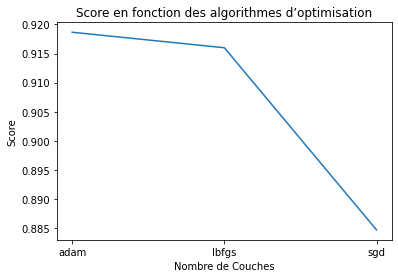

In [53]:
plt.title("Score en fonction des algorithmes d’optimisation")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(solvers, scorelist)

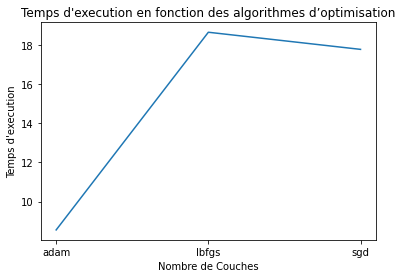

In [54]:
plt.title("Temps d'execution en fonction des algorithmes d’optimisation")
plt.xlabel("Nombre de Couches")
plt.ylabel("Temps d'execution")
plt.plot(solvers, temps)

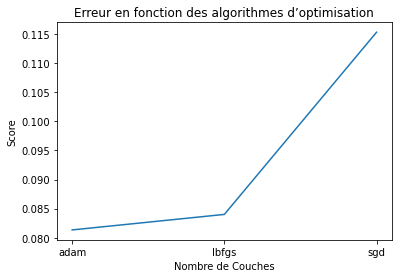

In [55]:
plt.title("Erreur en fonction des algorithmes d’optimisation")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(solvers, error)

Varier les fonctions d’activation {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}.

In [4]:
activations = ['identity', 'logistic', 'tanh', 'relu']
error = []
scorelist = []
temps = []
for activation in activations:
    tps1 = time.time()
    clf = MLPClassifier(hidden_layer_sizes=(181, 180, 177, 158, 122, 108, 92, 80, 56), solver = 'adam', activation = activation).fit(xtrain, ytrain)
    clf.fit(xtrain, ytrain)
    ypredicted = clf.predict(xtest)
    tps2 = time.time()
    score = clf.score(xtest, ytest)
    error_ = metrics.zero_one_loss(ytest, ypredicted)
    error.append(error_)
    scorelist.append(score)
    temps.append(tps2-tps1)
    print("Convergence with %s: %.4f" % (activation, clf.score(xtest, ytest)))

Convergence with identity: 0.9068
Convergence with logistic: 0.1176
Convergence with tanh: 0.9576
Convergence with relu: 0.9801


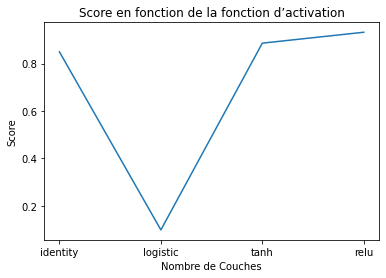

In [57]:
plt.title("Score en fonction de la fonction d’activation")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(activations, scorelist)

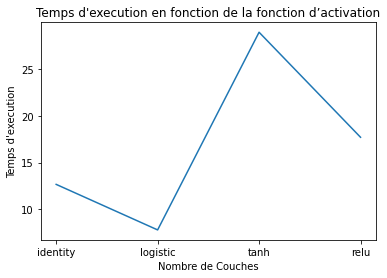

In [58]:
plt.title("Temps d'execution en fonction de la fonction d’activation")
plt.xlabel("Nombre de Couches")
plt.ylabel("Temps d'execution")
plt.plot(activations, temps)

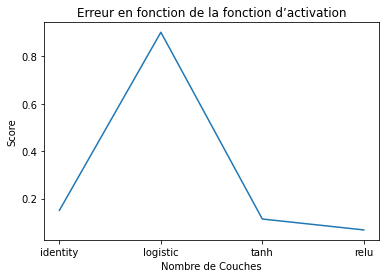

In [59]:
plt.title("Erreur en fonction de la fonction d’activation")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(activations, error)

Changer la valeur de la régularisation L2 (paramètre α).

In [60]:
error = []
scorelist = []
temps = []
alpha = []
for alp in np.arange(0.1, 1, 0.1):
    tps1 = time.time()
    clf = MLPClassifier(hidden_layer_sizes=(181, 195, 177, 158, 122, 108, 92, 80, 56),
                        solver = 'adam',
                        activation = 'relu',
                        alpha = alp).fit(xtrain, ytrain)
    clf.fit(xtrain, ytrain)
    ypredicted = clf.predict(xtest)
    tps2 = time.time()
    score = clf.score(xtest, ytest)
    error_ = metrics.zero_one_loss(ytest, ypredicted)
    error.append(error_)
    scorelist.append(score)
    temps.append(tps2-tps1)
    alpha.append(alp)
    print("Convergence with %s: %.4f" % (alp, clf.score(xtest, ytest)))

/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Convergence with 0.1: 0.9360
Convergence with 0.2: 0.9187
Convergence with 0.30000000000000004: 0.9260
Convergence with 0.4: 0.9247
Convergence with 0.5: 0.9300
Convergence with 0.6: 0.9360
Convergence with 0.7000000000000001: 0.9240
Convergence with 0.8: 0.9287
Convergence with 0.9: 0.9247


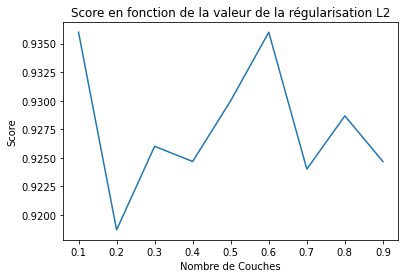

In [61]:
plt.title("Score en fonction de la valeur de la régularisation L2")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(alpha, scorelist)

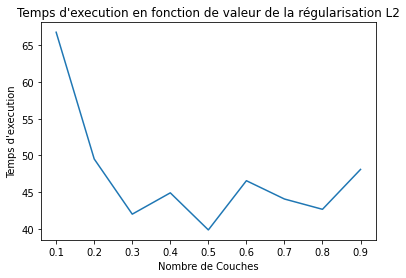

In [62]:
plt.title("Temps d'execution en fonction de valeur de la régularisation L2")
plt.xlabel("Nombre de Couches")
plt.ylabel("Temps d'execution")
plt.plot(alpha, temps)

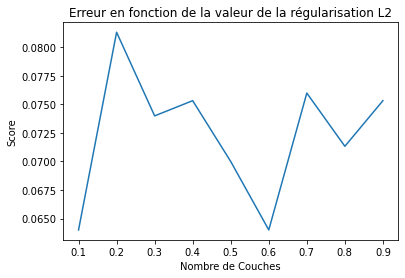

In [63]:
plt.title("Erreur en fonction de la valeur de la régularisation L2")
plt.xlabel("Nombre de Couches")
plt.ylabel("Score")
plt.plot(alpha, error)

Choisissez le modèle qui propose de meilleurs résultats. (the fastest? of adam, lbfgs, sgd)

Sur chacun des cas précédents, tracez les différentes courbes d'erreurs.
- Temps d’apprentissage,
- Précision, rappel
- Erreur avec le package metrics.zero_one_loss(ytest, ypredTest). 

/usr/local/insa/anaconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


array([[2059,    0,    5,    0,    1,    1,    8,    0,    2,    8],
       [   0, 2309,    3,    0,    9,    0,    1,    3,    0,    1],
       [   3,    4, 2096,    2,    4,    0,    3,   18,    4,    3],
       [   0,    5,   34, 2019,    0,    5,    1,   15,    7,    9],
       [   1,    0,    2,    0, 1952,    1,    1,    3,    0,   22],
       [   7,    2,    2,   29,    3, 1848,   23,    2,   18,   24],
       [   3,    4,    1,    0,   35,    0, 2024,    0,    6,    0],
       [   2,    1,    9,    3,    4,    0,    0, 2143,    0,   24],
       [   5,   25,   25,   26,   14,    5,    5,    6, 1978,   26],
       [   3,    0,    1,    8,   21,    2,    1,   11,    1, 1996]])

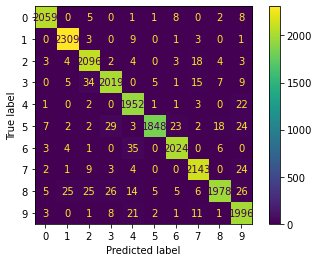

In [20]:
from sklearn.metrics import confusion_matrix
clf = MLPClassifier(hidden_layer_sizes=(181, 195, 177, 158, 122, 108, 92, 80, 56),
                        solver = 'adam',
                        activation = 'relu',
                        alpha = 0.6).fit(xtrain, ytrain)
clf.fit(xtrain, ytrain)
ypredicted = clf.predict(xtest)
cm = confusion_matrix(ytest, ypredicted)
metrics.plot_confusion_matrix(clf, xtest, ytest)
cm

In [21]:
metrics.precision_score(ytest, ypredicted, average = 'macro')

0.9727362866646999